# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### [Dataset Description ](https://www.kaggle.com/code/ahmedhaytham/medical-appointment-no-shows-0)

This dataset contains 100K records of medical appointments in Brazil and is focused on if patients will show up or not.
It has the following patient charecteristics:

1. PatientId: Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female.
4. AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
5. ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True or False.

### Question(s) for Analysis

The main question posed by this dataset is to find out what contributes to a patient showing up to their appointment:

1. Which Age Group is the most committed to honor their appointments?
2. Does Gender have an effect on Patients showing up for their appointments?
3. Is being on the Brasilian Welfare Program a motivator to show up for appointments?
4. Does sending SMS reminders reduce no shows for set appointments?
5. Which diagnostic disease has the most influence on a patient's attendence?
6. Which Neighbourhoods have a lower No-Show rate?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Upgrade seaborn to 0.12.2
!pip install --upgrade seaborn==0.12.2

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [5]:
#load data
df = pd.read_csv('./noshowappointments-kagglev2-may-2016 (1).csv')

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This dataset has no null values, since **PatientId** and **AppointmentID** are specific to individual patients, in this analysis will not have much use for them hence dropping then refines the data to what we need. Next we drop the irrelevant columns and look at the statistical analysis to see if there are any anomalies in the data, but before that we check for any duplicated patient records.

In [8]:
df.duplicated().sum()

0

As seen there are no duplicate records now we drop PatientId and AppointmentID

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Looking at the stats summrary for the data, the **Handcap** column seems to have a max of 4 but is set in the variable description to only contain True(1) and False(0). Lets see the unique values that it has.

In [10]:
#print unique values
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [11]:
# what is the value count for each
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

The column seems to hold additional values 2,3 and 4. Since we have limited understanding or explanation regarding these values from the data source, leaving the Handcap column out of the analysis is sufficient since it only represents 2.23% of all booked patients in the dataset

In [12]:
df.drop('Handcap', axis=1, inplace=True)

Now looking at ages of patients, we see the max age is 115, most fall in between 18 and 55 with most aged 37, but a min of -1 does not look right. Lets see if it is an input error. 

In [13]:
neg_age = df.query('Age == -1')
neg_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,No


As seen the data seems to be incorrectly inserted because an age of -1 is not valied, hence we drop the observation.

In [14]:
df.drop(neg_age.index, axis=0, inplace=True)

In [15]:
# verify if the record still exist
assert df.query('Age == -1').shape[0] == 0

In [16]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now the dataset looks much cleaner and statistically sound after cleaning the Age column and removing the Handcap column. Finally, to ease consistency renaming the df columns to all lowercase with an underscore('_') seperator and changing the target variable No-show to 1-Yes and 0-No, to make inferences.

In [17]:
df['No-show'] = df['No-show'].map({'Yes':1, 'No':0})

In [18]:
df['No-show'].unique()

array([0, 1])

In [19]:
df.rename(str.lower, axis='columns', inplace=True)

In [20]:
df.rename(columns={'no-show':'no_show'}, inplace=True)

In [21]:
bool_columns = ['no_show','hipertension', 'diabetes', 'alcoholism','sms_received', 'scholarship']
df[bool_columns] = df[bool_columns].astype(bool)
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship          bool
hipertension         bool
diabetes             bool
alcoholism           bool
sms_received         bool
no_show              bool
dtype: object

### What is the Show-Up and No-Show Rate for Patients?

Checking distribution of target variable(no_show) will tell us the proportions of patients who showed and did not, which will help us see the dominant class and how it may affect our analysis

In [22]:
# Find the no show proportionality
no_show_prob = df['no_show'].value_counts(normalize=True) * 100
show_up_rate = no_show_prob[False]
print()
no_show_prob

False    79.806561
True     20.193439
Name: no_show, dtype: float64

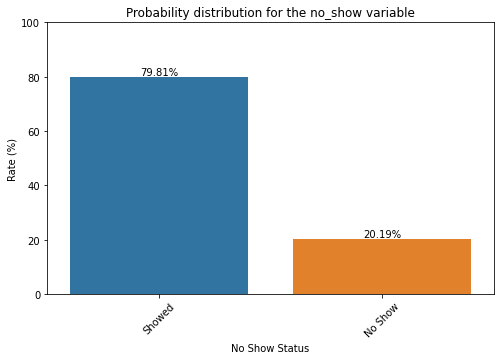

In [23]:
# Plot of the no_show target variable
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=no_show_prob.index, y=no_show_prob, ax=ax)
ax.set(xlabel = 'No Show Status', ylabel='Rate (%)',\
       title = 'Probability distribution for the no_show variable', ylim=(0,100))
plt.xticks([0,1],['Showed', 'No Show'], rotation=45)

ax.bar_label(ax.containers[0], fmt='%.2f%%');

Visualising the above plot we can see that our dataset is more dominant to patients who show up for appointments by 79.81% while 20.19% of patients do not show up. This is a case for an imbalanced dataset, according to [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#:~:text=Imbalanced%20data%20refers%20to%20those,dataset%20handling%20with%20an%20example.).

This makes the analysis more centered on patients who showed up. Thus determining reasons why patients do not honor up their medical appointments will not be accurately determined.

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Which Age Group is the most committed to honor their appointments?)

In [24]:
showed = df['no_show'] == False

In [25]:
no_show = df['no_show'] == True

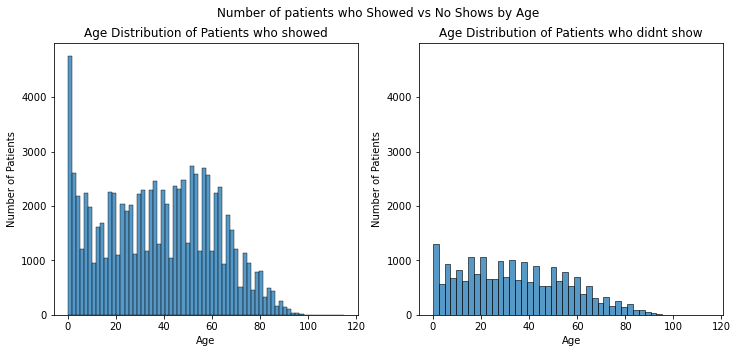

In [26]:

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Number of patients who Showed vs No Shows by Age')
#first plot
sns.histplot(data=df[showed], x='age', ax=ax1)
ax1.set_title('Age Distribution of Patients who showed')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Patients')

#second plot
sns.histplot(data=df[no_show], x='age', ax=ax2)
ax2.set_title('Age Distribution of Patients who didnt show')
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of Patients');

Other than the distribution having extreme outliers of patients above 100 years, there is not much influence of age contributing to a patient showing up but I think grouping will give more concise visualisation. Grouping ages by categories can make bins which makes the visualize grouped by the age the patient falls under as follows:

- Infant: 0-12
- Teenager: 13-20
- Young Adult: 21-39
- Middle Aged: 40-65
- Senior: 66+

In [27]:
bin_edges = [-1,12,20,39,65,115]
bin_labels = ['infant','teen', 'young_adult', 'middle_aged', 'senior']

In [28]:
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_labels)

In [29]:
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = bin_labels)
df['age_groups'] = df['age_groups'].astype(ordered_var)
   

In [30]:
# Age group distribution
age_count = df['age_groups'].value_counts(sort=False)
age_count

infant         21036
teen           10812
young_adult    27433
middle_aged    37944
senior         13301
Name: age_groups, dtype: int64

Now we can clearly see the age groups and the number of patients in each group, middle_aged patients seems to have set more medical appointments with 37944 patients, and the lowest being teens with 10812 patients. Are the genders equally distributed in these groups, or there is a dominant one?

In [31]:
# Extract the number of patients who showed up
showed_age = df.age_groups[showed].value_counts()
showed_age

middle_aged    31112
young_adult    21108
infant         16729
senior         11235
teen            8023
Name: age_groups, dtype: int64

In [32]:
##### Patient proportions vs no_show feature
no_show_age = df.groupby('age_groups', as_index=False)['no_show'].value_counts(normalize=True)
no_show_age['proportion'] = round(no_show_age['proportion'] * 100, 2)
no_show_age

,age_groups,no_show,proportion
0,infant,False,79.53
1,infant,True,20.47
2,teen,False,74.20
3,teen,True,25.80
4,young_adult,False,76.94
5,young_adult,True,23.06
6,middle_aged,False,81.99
7,middle_aged,True,18.01
8,senior,False,84.47
9,senior,True,15.53


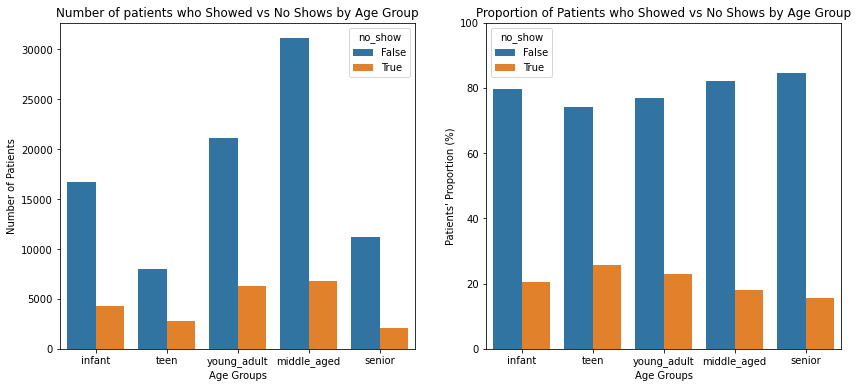

In [33]:
# Plot of the patients who showed vs who didnt show for the appointment
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6))
group_bar = sns.countplot(data=df, x='age_groups', hue='no_show',ax=ax1)
ax1.set(title='Number of patients who Showed vs No Shows by Age Group', ylabel='Number of Patients', xlabel='Age Groups');

#proportioned
group_bar = sns.barplot(data=no_show_age, x='age_groups', y='proportion', hue='no_show',ax=ax2)
ax2.set(title='Proportion of Patients who Showed vs No Shows by Age Group', ylabel="Patients' Proportion (%)", xlabel='Age Groups')
ax2.set_ylim(0,100);

After looking at the age group of patients distribution (left figure), there was no clear depiction on its effect on how much these groups show-up or do not show for their appointments, hence group proportions seemed necessary. The patients who show up tend to not be affected by which age group they qualify in but at most there is a chance greater than 70% that any age group can honor their medical appointment. Among them, the senior  patients show up more for there booked appointment with an 84.47% show up mean while at the rear end, teens tend to be close to the show up rate lower limit within the selected population and therefore making them the most likely to not show for appointments by 25.80%.

#### Results
There is not much of a huge difference between the likelihood of a certain age group showing up for their medical appointments but the **senior** group is slightly higher than the rest followed by the **middle-aged** group(40-65). Then the rest follow each other closely.

### Research Question 2  (Does Gender have an effect on Patients showing up for their appointments?)

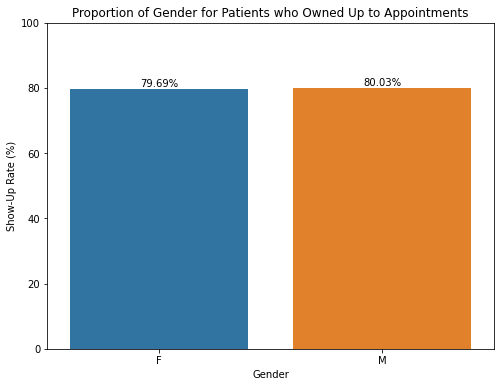

In [34]:
gender_showed = round((1 - df.groupby('gender')['no_show'].mean()) * 100, 2)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=gender_showed.index, y=gender_showed, ax=ax)
ax.set(xlabel='Gender', ylabel='Show-Up Rate (%)', title = 'Proportion of Gender for Patients who Owned Up to Appointments')
ax.set_ylim(0,100)
for i in ax.containers:
  ax.bar_label(i, fmt='%.2f%%')

There is not seem to be a difference between genders when it comes to patients who show up, hence let us see if it changes if we further group them by age groups.

In [35]:
# The average of the genders not showing up for their appointment
genders = df.groupby(['gender','age_groups'], as_index=False)['no_show'].mean()
genders['no_show'] = round((1 - genders['no_show']) * 100, 2)
genders

,gender,age_groups,no_show
0,F,infant,79.55
1,F,teen,74.69
2,F,young_adult,76.87
3,F,middle_aged,81.66
4,F,senior,84.34
5,M,infant,79.51
6,M,teen,73.27
7,M,young_adult,77.14
8,M,middle_aged,82.71
9,M,senior,84.73


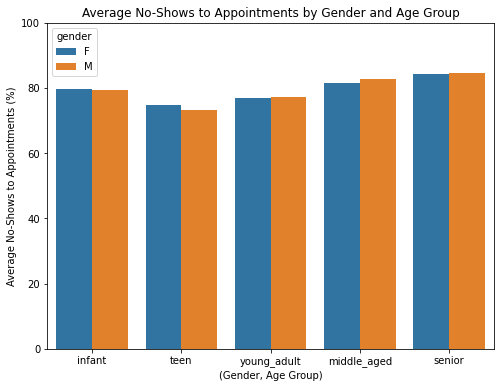

In [36]:
# Average of genders in a plot
fig, ax = plt.subplots(figsize=(8,6))
group_bar = sns.barplot(data=genders, x='age_groups', y='no_show', hue='gender',ax=ax)
ax.set(title='Average No-Shows to Appointments by Gender and Age Group', ylabel="Average No-Shows to Appointments (%)", xlabel='(Gender, Age Group)')
ax.set_ylim(0,100);
plt.show();

#### Results

From the plot above, we can see that Gender has no effect on a patients decision to not come in for their medical appointment, furthermore gender within the age groups are closely the same.Hence in conclusion, among Seniors being the most likely to show up for appointments,  gender does not influence attendance rate.

### Research Question 3  (Is being on the Brasilian Welfare Program a motivator to show up for appointments?)

Known as the [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) was a social welfare program of the Government of Brazil. This program provided financial aid for the less fortunate. The fund seems to favor families with a female lead but also provided vaccinated children up to the youth of 17 year old (teenagers). Now let's explore how many on the fund owned up to their appointments.

In [37]:
scholars = (1 - df.groupby('scholarship')['no_show'].mean()) * 100
scholars

scholarship
False    80.192645
True     76.263696
Name: no_show, dtype: float64

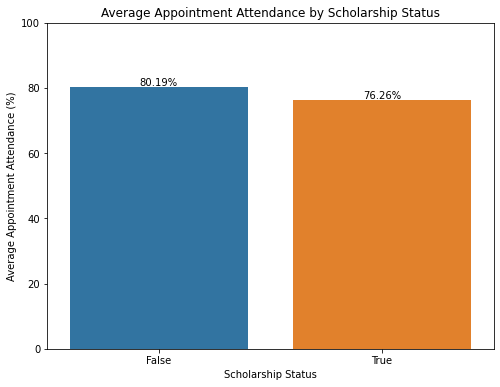

In [38]:
# Plot of the sponsored patients who showed vs who didnt show for the appointment
fig, ax = plt.subplots(figsize=(8,6))
group_bar = sns.barplot(x=scholars.index, y=scholars, ax=ax)
ax.set(title='Average Appointment Attendance by Scholarship Status', ylabel="Average Appointment Attendance (%)", \
       xlabel='Scholarship Status')
ax.set_ylim(0,100)
ax.bar_label(ax.containers[0], fmt='%.2f%%');


#### Results 
From the Statistical Summary printed in Data Wrangling section, we see that Sponsored Patients make up 9% of the population and 76.26% of them do show up and for those who are not on scholarship has a higher attendance rate of 80.19%, concluding that being on Scholarship/Sponsorship is not a direct motivator since those who aren't tend to show up for appointments more by 3.93%.

### Research Question 4  (Does sending SMS reminders reduce no shows for set appointments?)

When a patient sets an appointment they are sent an SMS Reminder, but could this have positive effects on patient actually showing up for their appointment?

In [39]:
received_sms = df['sms_received'] == 1

In [40]:
sms_ed = df.groupby('sms_received')['no_show'].mean() * 100
sms_ed

sms_received
False    16.703534
True     27.574545
Name: no_show, dtype: float64

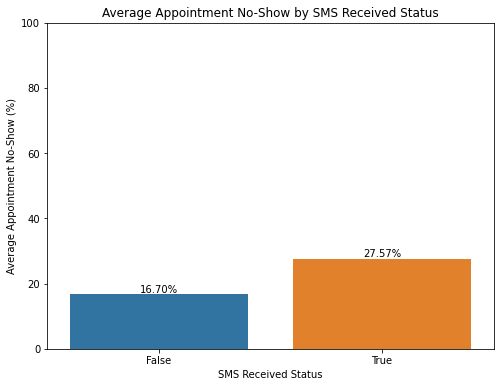

In [41]:
# Plot of the sms'ed patients who showed vs who didnt show for the appointment
fig, ax = plt.subplots(figsize=(8,6))
group_bar = sns.barplot(x=sms_ed.index, y=sms_ed, ax=ax)
ax.set(title="Average Appointment No-Show by SMS Received Status", ylabel="Average Appointment No-Show (%)", \
       xlabel='SMS Received Status')
ax.set_ylim(0,100)
ax.bar_label(ax.containers[0], fmt='%.2f%%');

From the patients who got SMSed there was an ~7% of no show increase while those who did not receive an sms reminder had a reduction of 3.49% from the global no-show rate of 20.19%. Therefore the patients who were not SMSed had a lower no-show rate to their medical appointments than the rest of the population thus showing that sms reminders does not have an effect in the reduction of patient no-shows to their appointments.

### Research Question 5  (Which diagnostic disease has the most influence on a patient's attendance?)

A patient may be more likely to attend for their appointment according to what disease they were diagnosed with.

In [42]:
diagnosis_show_stats = df.groupby(['diabetes', 'hipertension', 'alcoholism'], as_index=False)['no_show'].mean()
# sum_group = df.groupby(['diabetes', 'hipertension', 'alcoholism'], as_index=False)['no_show'].count()

diagnosis_show_stats['no_show'] = round(diagnosis_show_stats['no_show'] * 100, 2)
diagnosis_show_stats

,diabetes,hipertension,alcoholism,no_show
0,False,False,False,20.91
1,False,False,True,21.46
2,False,True,False,17.08
3,False,True,True,18.49
4,True,False,False,19.99
5,True,False,True,17.11
6,True,True,False,17.58
7,True,True,True,17.97


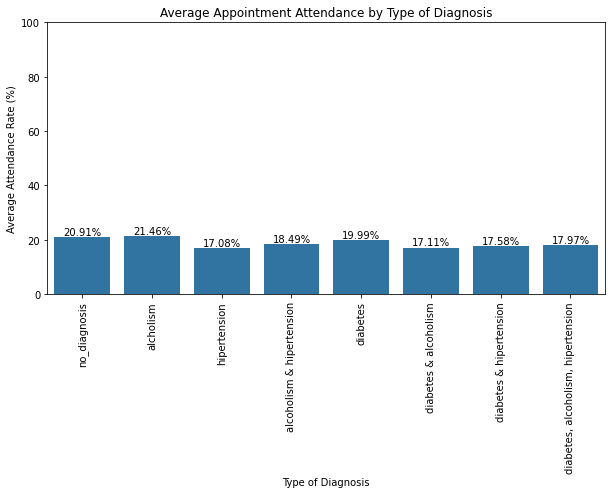

In [85]:
labels = ['no_diagnosis', 'alcholism','hipertension','alcoholism & hipertension','diabetes',
         'diabetes & alcoholism', 'diabetes & hipertension','diabetes, alcoholism, hipertension']
fig, ax = plt.subplots(figsize=(10,5))
group_bar = sns.barplot(data=diagnosis_show_stats, x=diagnosis_show_stats.index, y=diagnosis_show_stats['no_show'], \
                        color=sns.color_palette()[0], ax=ax)
ax.set(title="Average Appointment Attendance by Type of Diagnosis", xlabel="Type of Diagnosis", \
       ylabel='Average Attendance Rate (%)')
ax.set_ylim(0,100)
ax.set_xticks([0,1,2,3,4,5,6,7],labels, rotation=90)
ax.bar_label(ax.containers[0], fmt='%.2f%%');

All patients who have hipertension and/or in their diagnosis tend to have a lower no-show rate than the rest of the population (20.19%), while those with alcholism and with no diagnosed disease tend to have a little fraction higher in their no-show rates. Hence patients diagnosed with hipertension and/or diabetes tend to show up more to their medical appointments

### Research Question 6  (Which Neighbourhoods have a lower No-Show rate?)

In [98]:
df['neighbourhood'].nunique()

81

Since there are 81 neighbourhoods in the dataset, it is best to first trim down to those with atleast 1% of patient population then take the first 10 lower no-show rate neighbourhoods.

In [102]:
# Select neighbourhoods with atleast 1% of patient population
neighbourhoods = (df['neighbourhood'].value_counts() > (df.shape[0] *0.01)) == True
neighbourhoods_1perc = ([hood for hood in neighbourhoods.index if neighbourhoods[hood] == True])

# Get top 10 no-show rate for the lower end
less_no_shows = df.query('neighbourhood in @neighbourhoods_1perc').groupby('neighbourhood', as_index=False)['no_show'].mean()
less_no_shows['no_show'] = less_no_shows['no_show'] * 100
neighbour_top10 = less_no_shows.sort_values(by='no_show')[:10]
neighbour_top10

,neighbourhood,no_show
25,SANTA MARTHA,15.841584
15,JARDIM DA PENHA,16.275471
5,CONSOLAÇÃO,17.223837
28,SANTO ANTÔNIO,17.625637
22,REDENÇÃO,17.707663
20,NOVA PALESTINA,17.756184
13,JABOUR,17.975289
17,JOANA D´ARC,18.079888
34,TABUAZEIRO,18.295019
8,FORTE SÃO JOÃO,18.316570


Among the 81 neighbourhoods, there were 35 that had atleast 1% of patients population with medical appointments. From the selected 10, the no-show rate seems to range between 15.5-18.5% which is definitely lower than the global no-show rate.

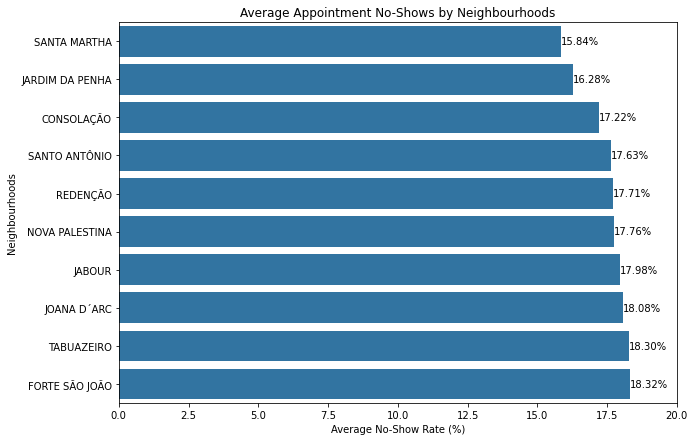

In [97]:
fig, ax = plt.subplots(figsize=(10,7))
group_bar = sns.barplot(data=neighbour_top10, y='neighbourhood', x='no_show', \
                        color=sns.color_palette()[0], ax=ax)
ax.set(title="Average Appointment No-Shows by Neighbourhoods", ylabel="Neighbourhoods", \
       xlabel='Average No-Show Rate (%)')
ax.set_xlim(0,20)
ax.bar_label(ax.containers[0], fmt='%.2f%%');

Santa Martha has the lowest no-show rate from the group of 15.84%, a 4.35% reduction from the rest of the population while Tabuazeiro and Forte Sao Joao have ~1.9% reduction as they only have a subtle difference of 0.02% between them. With this we can confidently conclude that neighbourhoods have varying influence on the patients if they show up for their appointments.

<a id='conclusions'></a>
## Conclusions

After analysing the possible features that partain to what may cause a patient to not show up for their appointment, there were several conclusions that was derived from the analysis.

1. The Senior Age Group (66+) are most likely to show up for the appointments 84.47% of the time but all age groups have a probability more than 70% making age not a driving factor of people showing up.
2. Gender does not have influence on patients not attending for their appointment, as seen that Senior females are likely 
3. For the 9% on Welfare Plan they are less likely to make it to appointments by 3.55%.
4. Receiving a reminder SMS yeilds no effect to a patients honoring up their appointment but surprisingly the patients who did not receive an SMS tend to not show less for their appointment by 3.49%.
5. Among all diagnosed and non-diagnosed patients, hipertensive and diabetic patients had a lower no-show rate than the rest of the population.
6. Among the 35 neighbourhoods with atleast 1% of patient population, the 10 with low no-show rates in order from most to least to attend:
- SANTA MARTHA
- JARDIM DA PENHA
- CONSOLAÇÃO
- SANTO ANTÔNIO
- REDENÇÃO
- NOVA PALESTINA
- JABOUR
- JOANA D´ARC
- TABUAZEIRO
- FORTE SÃO JOÃO

#### Limitations

1. The dataset was derived from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments) and the description that it gave on **Handcap** variable caused it to be flawed since it stated that the only values for it was 0-True and 1-False, but contains in addition numbers 2-4. This flaw had implications on limiting exploration of the main objective which required finding out possible reasons why patients do not show up for appointments as follows:

  -  Deciding to drop the column removed associations it may have with other features
  -  Eliminated examining why handcap patients do not show for their appointments


2. The target feature(**no_show**) shows an imbalance in its distribution with patients who show up for their appointments show dominance of 79.81% compared to 20.19% of patients who do not show up. This makes the analysis more centered on patients who showed up. Thus determining reasons why patients do not honor up their medical appointments will not be accurately determined.


In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert','--to','pdf', 'no_show_appointment.ipynb'])

[NbConvertApp] Converting notebook no_show_appointment.ipynb to pdf
[NbConvertApp] Support files will be in no_show_appointment_files/
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Making directory ./no_show_appointment_files
[NbConvertApp] Writing 91115 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PD

0